# Importing Datasets

In [1]:
import numpy as np
import pandas as pd

#  Reading the train.csv dataset

In [3]:
df = pd.read_csv('Dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

# Encoding the Columns

In [22]:
from sklearn.preprocessing import LabelEncoder
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])

In [32]:
X = df[['Age','Sex','Fare']]
y = df.iloc[:,1]


In [33]:
features = ['Age','Sex','Fare']

# Building the Decision Tree Model

In [47]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [49]:
with open('dt2.dot','w') as f:
    f = tree.export_graphviz(clf, feature_names=features, out_file=f);

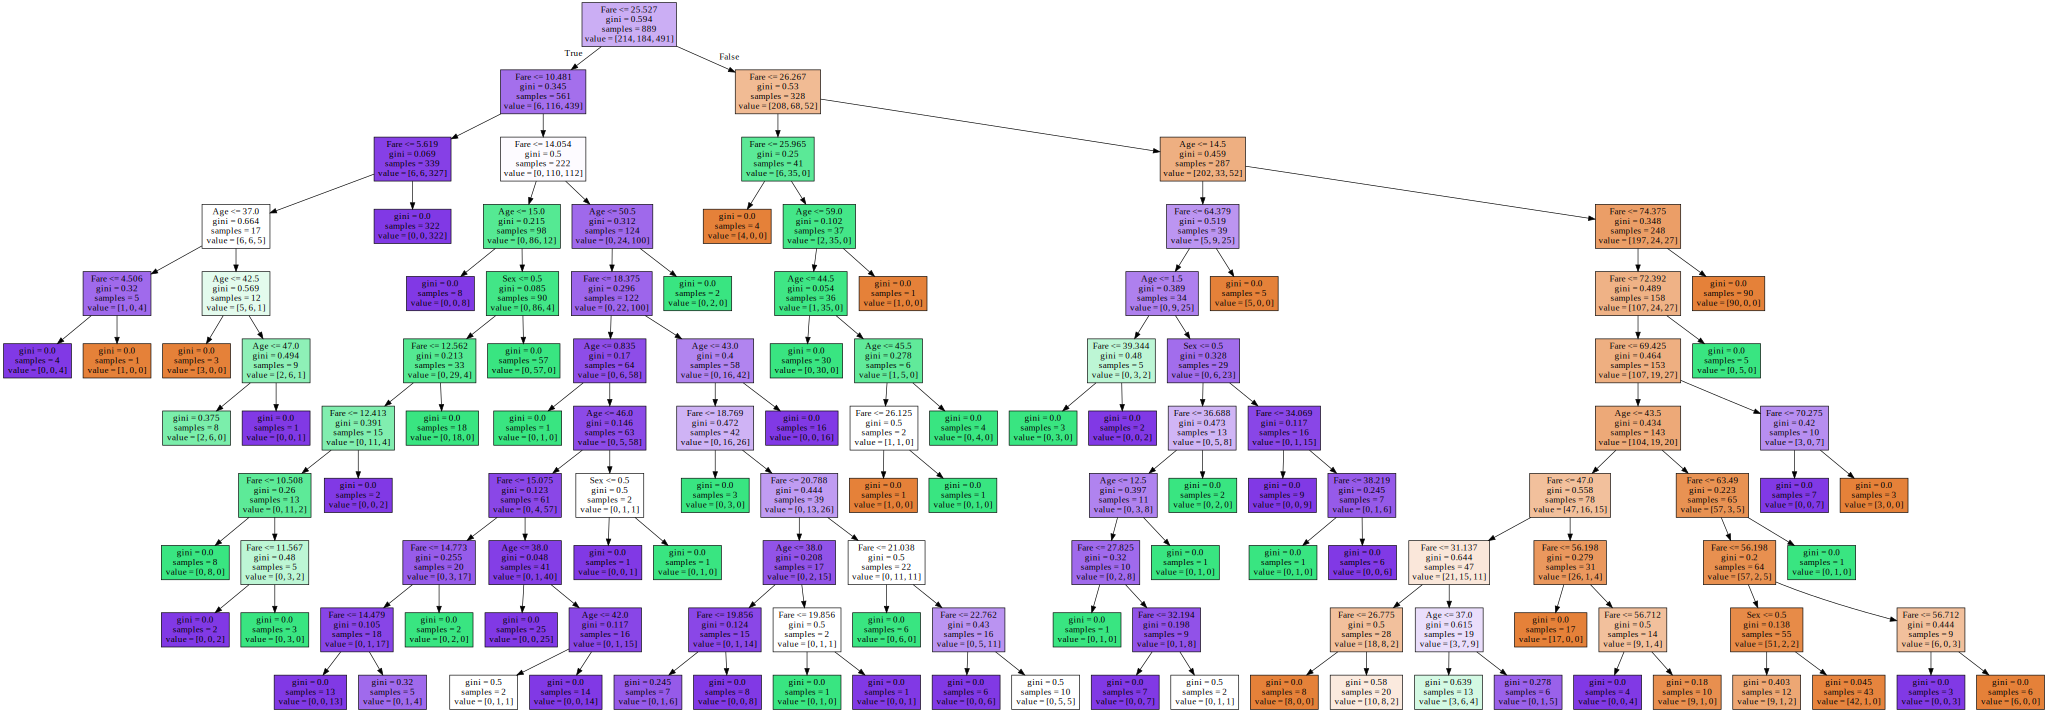

In [50]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=features, filled = True))
display(SVG(graph.pipe(format='svg')))

# Reading the test.csv Dataset

In [67]:
test_df = pd.read_csv('Dataset/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [68]:
test_df.drop(['Name','Ticket'], axis=1, inplace=True)

In [69]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [70]:
test_df["Sex"] = LabelEncoder().fit_transform(test_df["Sex"])
test_df["Embarked"] = LabelEncoder().fit_transform(test_df["Embarked"])

In [71]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [72]:
fea = test_df[['Age', 'Sex', 'Fare']]

# Predicting the Results

In [73]:
ypred = clf.predict(fea)

In [75]:
res = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': ypred })
res.head()

,PassengerId,Survived
0,892,3
1,893,3
2,894,3
3,895,3
4,896,2


# Prediction Score

In [80]:
clf.score(X,y)

0.9617547806524185

-----------------